## Verify Python 3

In [13]:
import sys

if sys.version_info[0] < 3:
    raise "Must be using Python 3"
else:
    print("Alrite! We are using Python "+str(sys.version_info[0]))

Alrite! We are using Python 3


## Install OMXWare

In [14]:
!echo 'y' | pip uninstall omxware

#Install OMXWare client
!pip install --no-cache-dir omxware 

#Install PrettyPrint
!pip install --no-cache-dir pprint

#Install py4j to use Dynamic forms
!pip install --no-cache-dir py4j

#Install panda
!pip install --no-cache-dir pandas

Found existing installation: omxware 0.1.45
Uninstalling omxware-0.1.45:
  Would remove:
    /home/vader/Projects/python3_env/lib/python3.7/site-packages/omxware-0.1.45.dist-info/*
    /home/vader/Projects/python3_env/lib/python3.7/site-packages/omxware/*
Proceed (y/n)?   Successfully uninstalled omxware-0.1.45
You should consider upgrading via the '/home/vader/Projects/python3_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/vader/Projects/python3_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/vader/Projects/python3_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/vader/Projects/python3_env/bin/python -m pip install --upgrade pip' command.


In [15]:
!pip show omxware

Name: omxware
Version: 0.1.45
Summary: IBM Functional Genomics Platform SDK to explore data.
Home-page: https://github.ibm.com/GrandChallenge-Almaden/omxware-pypi
Author: Harsha Krishnareddy
Author-email: hvkrishn@us.ibm.com
License: IBM
Location: /home/vader/Projects/python3_env/lib/python3.7/site-packages
Requires: pandas, pycryptodome, matplotlib, python-keycloak, requests, IPython, configparser, urllib3, simplejson
Required-by: 


### Import OMXWare and initialize

In [16]:
%matplotlib inline

import json
import pprint
pp = pprint.PrettyPrinter(indent=4)

from IPython.display import display

import omxware


# --- Authentication options --- #
# generate token with OMXWare user name and password (likely done once and then stored in file, see usage below)
token = omxware.get_token('username', 'password') # fill in password to initiate token

# or

# use previously generated token loaded from file
# token_path = "./omxware_collaborative_work/super_awesome_token"  # update for your path to the token file you create
# f = open(token_path)
# token = f.readline()

# provide your token to authenticate with OMXWare
omx = omxware.omxware(token)

In [17]:
# help(omx)

#### Genomes for Genus: 'Abiotrophia'

In [18]:
# Get Genus object for genus_name = 'abiotrophia'
genus = omx.genus(genus_names='abiotrophia').results()[0]

# Get Genomes for the Genus ^^^^^^^^
genomes_for_genus = genus.genomes()
g4gdf = genomes_for_genus.results(type='df')[['genera','genome_type','id','taxid']]

display(g4gdf)

,genera,genome_type,id,taxid
0,[abiotrophia],GENBANK,GCA_013267415.1,46123
1,[abiotrophia],SRA,SRR1922824,46123
2,[abiotrophia],SRA,DRR015936,46123


### Get Genome by its ID

In [19]:
genome_id = 'SRR1922824'

genome = omx.genomes(ids=genome_id).results()[0]

# For the Genome ^^^^^^^^^^^
id = genome.id()
typ = genome.genome_type()
taxid = genome.taxid()

genera = genome.genus().results()

print('ID: ' + id)
print('Type: ' + typ)
print('TaxID: ' + taxid)
print('Genera: ' + str(genera))

ID: SRR1922824
Type: SRA
TaxID: 46123
Genera: [<omxware.entities.Genus.Genus object at 0x7f0e7c894990>]


### Get Genes for a Genome

In [20]:
genes = genome.genes(page_number=1, page_size=10)

### Distribution of Genes by Genera

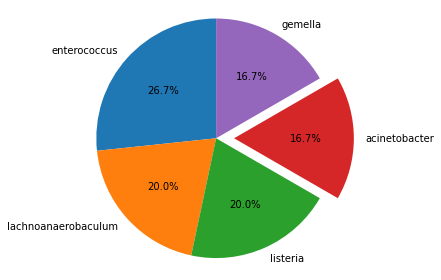

In [21]:
genes.show_facets(name='genera', topN=5)

### Get the Genes

In [22]:
gene_results = genes.results(type='df')
display(gene_results)

,id,name,type,genera,genomes,sequence_length,status,go_codes,interproscan_ids,omx_creation_ts,omx_modified_ts,classification
0,6603d7ee64b03dcf1978c16ff541a443,[L-arginine-specific L-amino acid ligase],gene,[abiotrophia],[SRR1922824],1167,active,"[GO:0005524, GO:0046872]",[IPR011761],2018-02-28T09:30:34.000-08:00,2018-02-28T09:30:34.000-08:00,[bacteria]
1,ee56e40e3465b892b76d9a8752784a62,[hypothetical protein],gene,[abiotrophia],[SRR1922824],1377,active,[],"[IPR017853, IPR032267]",2018-02-28T09:30:33.000-08:00,2018-02-28T09:30:33.000-08:00,[bacteria]
2,a98e35d98faeac3cca4c98281fdbb8b8,[ComE operon protein 1],gene,[abiotrophia],[SRR1922824],669,active,"[GO:0003677, GO:0006281]","[IPR003583, IPR004509, IPR010994, IPR019554]",2018-02-28T09:30:34.000-08:00,2018-02-28T09:30:34.000-08:00,[bacteria]
3,b93cde3fdd6360fb7911bbcdbefb7f33,[Energy-coupling factor transporter ATP-bindin...,gene,[abiotrophia],[SRR1922824],897,active,"[GO:0005524, GO:0016020, GO:0016887, GO:0055085]","[IPR003439, IPR003593, IPR015856, IPR017871, I...",2018-02-28T09:30:34.000-08:00,2018-02-28T09:30:34.000-08:00,[bacteria]
4,c7c69b17e25f5fbe3195f5fe4d9f7516,[DNA topoisomerase 4 subunit B],gene,[abiotrophia],[SRR1922824],2088,active,"[GO:0003677, GO:0003918, GO:0005524, GO:000569...","[IPR000565, IPR001241, IPR002288, IPR003594, I...",2018-02-28T09:30:33.000-08:00,2018-02-28T09:30:33.000-08:00,[bacteria]
5,9736211078bd74005ee0e4b9f8ac7fea,[Thiamine pyrophosphokinase],gene,[abiotrophia],[SRR1922824],675,active,"[GO:0004788, GO:0005524, GO:0006772, GO:000922...","[IPR006282, IPR007371, IPR007373, IPR036759]",2018-02-28T09:30:33.000-08:00,2018-02-28T09:30:33.000-08:00,[bacteria]
6,1faecc60aa8e96d69194feb11e043e07,[hypothetical protein],gene,[abiotrophia],"[DRR015936, SRR1922824]",183,active,[],[],2018-02-28T09:30:26.000-08:00,2018-02-28T09:30:26.000-08:00,[bacteria]
7,1984f6e62eac007041cb8c3944cc94dd,[hypothetical protein],gene,[abiotrophia],[SRR1922824],861,active,"[GO:0003677, GO:0043565]","[IPR001387, IPR010057, IPR010982]",2018-02-28T09:30:34.000-08:00,2018-02-28T09:30:34.000-08:00,[bacteria]
8,90b19bd2ed080a5dc98981ffdf4c790e,[DNA topoisomerase 4 subunit A],gene,[abiotrophia],[SRR1922824],2460,active,"[GO:0003677, GO:0003916, GO:0003918, GO:000552...","[IPR002205, IPR005741, IPR006691, IPR013757, I...",2018-02-28T09:30:33.000-08:00,2018-02-28T09:30:33.000-08:00,[bacteria]
9,cfecbc0f40e063e3bd08db30e02ab856,[30S ribosomal protein S19],gene,[abiotrophia],"[DRR015936, GCA_013267415.1, SRR1922824]",282,active,"[GO:0003723, GO:0003735, GO:0005840, GO:000641...","[IPR002222, IPR005732, IPR020934, IPR023575]",2018-02-28T09:30:25.000-08:00,2020-06-05T18:09:09.000-07:00,[bacteria]


### Get Genes as Fasta

In [23]:
gene_results_fasta = genes.results(type='fasta')
print(gene_results_fasta)

>OMX_gene_6603d7ee64b03dcf1978c16ff541a443|L-arginine-specific L-amino acid ligase
ATGAACTATATTGTTATTTCTCCCTACTACCCTGCTAACTTCCAGCCCTTTTCCTATAAGTTACGTCAACATGGCGTCAATGTCCTAGGGATTGGCCAGGAACCTTATGACCAACTCAACGATGAGCTCAAAGCGACCCTGACTGAATACTTCCGGGTGGATAATCTGGAAGACCTGGACCAAGTCACTCGTGCGGTTGCCTTCTTCTTCCACAAGTATGGACCGATCGACCGTATTGAGTCCCACAATGAATACTGGCTGGAATTAGATGCTGGTCTGCGTCAGCAGTTCAATATCTTTGGCGTCAAACCCCAAGATTTGGCCAAAACTAAGTACAAGTCCGTCATGAAGGAATACTTCCGCAAGGCTGGCGTACCGGTCGTGGACGGTCGCGTGGTTAGCCAGACTTCAGAAATCGATGCCGCCGTCCAAGACTTAGGCCTGCCACTGATTGCTAAACCCGATAATGGCGTGGGGGCTGCCGCTACCTACAAACTCATGACGCCAGAAGATGTGGCCCAATTCAAGGCTACTTGGGGCGAGTCCACTTCTTACTTCCTGGAGCAGTTTGTCTCCTATCCAACGGTGACGACTTTTGATGGTCTGATTGATGCCGAGGGTAATATTGTCTTCGAAACCGGTCTGACCTACTACTACCCACCACTGGAATTAGTCTTGGAGCGTAAGGACAATGCCTTCTATATTGAGAAGGAACTCCATCCTAAGTTGCGTGAATATGGCCATGCCATCATCAAGTCCTTCGGCATGAAGGAGCGCTTCTTCCATATCGAATTCTTCCGGACGCCGGACGATGACTTTATCGCCATTGAATACAACAACCGCCCAGCCGGTGGCTTCTGTATCGACATCTACAACTATGCCCATGATATTGACCTCTACGATTATTGGGCTAAGCT

### Get GO-terms and IPR-codes by Gene

In [24]:
genes = omx.genes(ids='921db25406f80e09c8f78dd915f355aa')
genes = genes.results()

gene = genes[0]
# print(gene)

display(gene.go().results(type='df'))
display(gene.ipr().results(type='df'))

,id,name,type,category,status,omx_creation_ts,omx_modified_ts,classification
0,GO:0005737,[cytoplasm],go,CELLULAR_COMPONENT,active,2018-11-30T13:04:11.000Z,2020-08-14T12:02:18.000Z,[bacteria]
1,GO:0006807,[nitrogen compound metabolic process],go,BIOLOGICAL_PROCESS,active,2018-11-30T13:04:11.000Z,2020-08-14T12:02:18.000Z,[bacteria]
2,GO:0003824,[catalytic activity],go,MOLECULAR_FUNCTION,active,2018-11-30T13:04:11.000Z,2020-08-14T12:02:18.000Z,[bacteria]
3,GO:0006542,[glutamine biosynthetic process],go,BIOLOGICAL_PROCESS,active,2018-11-30T13:04:11.000Z,2020-08-14T12:02:18.000Z,[bacteria]
4,GO:0009399,[nitrogen fixation],go,BIOLOGICAL_PROCESS,active,2018-11-30T13:04:11.000Z,2020-08-14T11:35:49.000Z,[bacteria]
5,GO:0004356,[glutamate-ammonia ligase activity],go,MOLECULAR_FUNCTION,active,2018-11-30T13:04:11.000Z,2020-08-14T12:02:18.000Z,[bacteria]


,id,name,type,category,description,status,omx_creation_ts,omx_modified_ts,classification
0,IPR001637,[Gln_synth_I_adenylation_site],ipr,CONSERVED_SITE,"Glutamine synthetase class-I, adenylation site",active,2019-07-18T16:02:34.000Z,2020-08-14T11:52:41.000Z,[bacteria]
1,IPR008147,[Gln_synt_b-grasp],ipr,DOMAIN,"Glutamine synthetase, beta-Grasp domain",active,2019-07-18T16:02:34.000Z,2020-08-14T11:52:45.000Z,[bacteria]
2,IPR008146,[Gln_synth_cat_dom],ipr,DOMAIN,"Glutamine synthetase, catalytic domain",active,2019-07-18T16:02:34.000Z,2020-08-14T12:08:57.000Z,[bacteria]
3,IPR014746,[Gln_synth/guanido_kin_cat_dom],ipr,HOMOLOGOUS_SUPERFAMILY,"Glutamine synthetase/guanido kinase, catalytic...",active,2019-07-18T16:02:34.000Z,2020-08-14T12:09:00.000Z,[bacteria]
4,IPR027302,[Gln_synth_N_conserv_site],ipr,CONSERVED_SITE,"Glutamine synthetase, N-terminal conserved site",active,2019-07-18T16:02:34.000Z,2020-08-14T11:52:52.000Z,[bacteria]
5,IPR036651,[Gln_synt_N],ipr,HOMOLOGOUS_SUPERFAMILY,"Glutamine synthetase, N-terminal domain superf...",active,2019-07-18T16:02:34.000Z,2020-08-14T12:09:03.000Z,[bacteria]
6,IPR004809,[Gln_synth_I],ipr,FAMILY,Glutamine synthetase type I,active,2019-07-18T16:02:34.000Z,2020-08-14T11:52:44.000Z,[bacteria]
7,IPR027303,[Gln_synth_gly_rich_site],ipr,CONSERVED_SITE,"Glutamine synthetase, glycine-rich site",active,2019-07-18T16:02:34.000Z,2020-08-14T12:09:01.000Z,[bacteria]
